<a href="https://colab.research.google.com/github/pkor725/modelling-with-polynomial-and-logistic-regression/blob/master/Moringa_Data_Science_Prep_W6_Independent_Project_2020_01_Gideon_Cheruiyot_DataReport_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

**Approach 1:** Polynomial approach

What to train given:

1. Rank of home team
2. Rank of away team
3. Tournament type

***Model 1:*** Predict how many goals the home team scores.

***Model 2:*** Predict how many goals the away team scores.

**Approach 2:** Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [0]:
#importing libriaries
import pandas as pd
import numpy as np
import seaborn as sbn

In [0]:
#loading our datasets
results = pd.read_csv(r'C:\Users\Gideon Kipkorir\Desktop\colab\Week 6 IP Datasets\results.csv')
ranking = pd.read_csv(r'C:\Users\Gideon Kipkorir\Desktop\colab\Week 6 IP Datasets\fifa_ranking.csv')

In [0]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
#previewing 'ranking' dataset
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
#Renaming column 'country columns' to acheive similarity before merging the dataset
ranking = ranking.rename(columns = {'country_full':'country'})

ranking = ranking.drop(columns = ['cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation','country_abrv','total_points','previous_points','rank_change','rank_date'])

In [0]:
ranking.head()

,rank,country
0,1,Germany
1,2,Italy
2,3,Switzerland
3,4,Sweden
4,5,Argentina


In [0]:
results = results.drop(columns = ['date', 'city', 'country', 'neutral'])

In [0]:

#merging datasets to get 'home_team' ranking
ranking_home_team = ranking.rename(columns= {'rank': 'home_team raking', 'country':'home_team'})#renaming to allow for merging of datasets
rrevised = pd.merge(results, ranking_home_team , on = 'home_team', how='left')
rrevised.to_csv(r'C:\Users\Gideon Kipkorir\Desktop\colab\Week 6 IP Datasets\hmranking.csv')
rrevised.head()

,home_team,away_team,home_score,away_score,tournament,home_team raking
0,Scotland,England,0,0,Friendly,30.0
1,Scotland,England,0,0,Friendly,28.0
2,Scotland,England,0,0,Friendly,29.0
3,Scotland,England,0,0,Friendly,25.0
4,Scotland,England,0,0,Friendly,24.0


***Due to memmory problems the dataset was merger externally as the procedure below failed on my pc***

In [0]:
#merging datasets to get 'home_team' ranking
# ranking_away_team = ranking.rename(columns= {'rank': 'away_team raking', 'country':'away_team'})#renaming to allow for merging of datasets
# both_ranking = pd.merge(rrevised, ranking_away_team , on = 'away_team', how='left')
# due to memmory problems the dataset was merger externall as the above procedure failed on my pc)
both_ranking = pd.read_csv(r'C:\Users\Gideon Kipkorir\Desktop\colab\Week 6 IP Datasets\both_ranking.csv', index_col = 0)
both_ranking.head()


C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,home_team,away_team,home_score,away_score,tournament,home_team raking,away_team raking
0,Scotland,England,0,0,Friendly,30.0,11.0
1,Scotland,England,0,0,Friendly,28.0,5.0
2,Scotland,England,0,0,Friendly,29.0,10.0
3,Scotland,England,0,0,Friendly,25.0,8.0
4,Scotland,England,0,0,Friendly,24.0,11.0


In [0]:
#Understanding our data types in our dataset
both_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
home_team           1048575 non-null object
away_team           1048575 non-null object
home_score          1048575 non-null int64
away_score          1048575 non-null int64
tournament          1048575 non-null object
home_team raking    1048374 non-null float64
away_team raking    1048316 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 64.0+ MB


In [0]:
#converting categorical subsets into intergers through label encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# both_ranking['home_team'] = le.fit_transform(both_ranking['home_team'])
# both_ranking['away_team']=le.fit_transform(both_ranking['away_team'])
both_ranking['tournament']= le.fit_transform(both_ranking['tournament'])
both_ranking.head()


,home_team,away_team,home_score,away_score,tournament,home_team raking,away_team raking
0,Scotland,England,0,0,18,30.0,11.0
1,Scotland,England,0,0,18,28.0,5.0
2,Scotland,England,0,0,18,29.0,10.0
3,Scotland,England,0,0,18,25.0,8.0
4,Scotland,England,0,0,18,24.0,11.0


In [0]:
#checking for null values
both_ranking.isnull().sum()

home_team             0
away_team             0
home_score            0
away_score            0
tournament            0
home_team raking    201
away_team raking    259
dtype: int64

In [0]:
#deleting null values
both_ranking = both_ranking.dropna()

In [0]:
both_ranking.isnull().sum()

home_team           0
away_team           0
home_score          0
away_score          0
tournament          0
home_team raking    0
away_team raking    0
dtype: int64

# Approach 1: Polynomial approach
## Model 1: Predict how many goals the home team scores.

In [0]:
#diving our dataset into dependent and inpendent variables
x = both_ranking[['home_team raking','away_team raking', 'tournament' ]]
y = both_ranking['home_score']

,home_team raking,away_team raking,tournament
home_team raking,1.000000,0.034272,0.008650
away_team raking,0.034272,1.000000,0.003639
tournament,0.008650,0.003639,1.000000


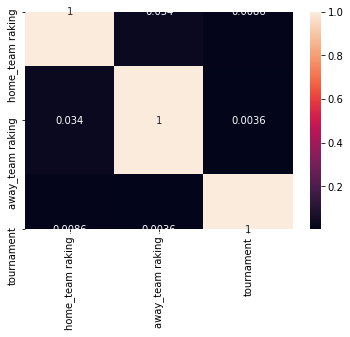

In [0]:
#getting hints of multicolinearity using correlation test
import seaborn as snb
snb.heatmap(x.corr(), annot= True)
correlations = x.corr()
correlations

there is no correlation between indpendent variables thus suitable for linear regression.

In [0]:
#test for multicollinearity using variance inflation factor

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_team raking,away_team raking,tournament
home_team raking,1.001249,-0.034284,-0.008536
away_team raking,-0.034284,1.001187,-0.003347
tournament,-0.008536,-0.003347,1.000086


**vif** reveals a score of less than 5 whcih could suggest possible multicolinearity in our indpendent variables.However, since we are more focussed in making prediction and not the contribution of each feature to the dependent variable, we will ignore the multicolinearity.


In [0]:
#spliting our dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.6, random_state =0)

this is for learning purpose, a huge dataset for training overwhelms my pc thus ,  i split the dataset into almost equal subsets 

In [0]:
#Fiting the polynomial Regression into the dataset

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
#transforming features

poly_reg = PolynomialFeatures(degree = 4)
xp_train = poly_reg.fit_transform(x_train)
xp_test  = poly_reg.fit_transform(x_test)
LinReg.fit(xp_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can improve the accuracy of our model by adjusting the degree

In [0]:
#predicting with the model

from sklearn import metrics
y_pred = LinReg.predict(xp_test)
rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("root mean square  error:"+str(rmse_value))

root mean square  error:1.6771155211426576


#residual plots
residuals =np.subtract(y_pred, y_test)
pd.DataFrame(residuals).describe()


In [0]:
print(residuals.mean())

-0.007940444634676087


Text(0.5, 0, 'fitted values')

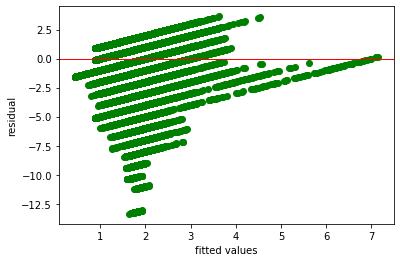

In [0]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,residuals, color = 'green' )
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.ylabel('residual')
plt.xlabel('fitted values')


our minimum and maximum values appear to be evenly distant from the mean indicating possible unavailability of outliers'
nevertheless our mean is close to 0, indicating that we are fairly correctly.

In [0]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


## cross validation

In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics

folds  = KFold(n_splits = 5)
RMSES = []
count = 1

for train_index, test_index in folds.split(x):
  print('\nTraining model ' + str(count))
x_train, x_test = x[train_index], x[train_index]
y_train, y_train = y[train_index], y[train_index]


#fiting the model to our dataset

X_train = poly_reg.fit_transform(x_train)
X_test = poly_reg.fit_transform(x_test)

LinReg.fit(X_train, y_train)
#using the model for prediction

y_pred =LinReg.predict(X_test)
rsme_value = np.substract(y_pred, y_test)
RMSES.append(rsme_value)
print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
count = count + 1



# Model 2: Predict how many goals the away team scores.

In [0]:
#diving our dataset into dependent and inpendent variables
x = both_ranking[['home_team raking','away_team raking', 'tournament' ]]
y = both_ranking['away_score']

In [0]:
#spliting our dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.6, random_state =0)

In [0]:
#Fiting the polynomial Regression into the dataset

poly_reg = PolynomialFeatures(degree = 4)
xp_train = poly_reg.fit_transform(x_train)
xp_test  = poly_reg.fit_transform(x_test)
LinReg.fit(xp_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# =predicting with the model
y_pred = LinReg.predict(xp_test)


In [0]:
#computing the root mean square error

y_pred = LinReg.predict(xp_test)
rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("root mean square  error:"+str(rmse_value))

root mean square  error:1.6771155211426576


In [0]:
#residual plots

residuals =np.subtract(y_pred, y_test)
pd.DataFrame(residuals).describe()


,away_score
count,628869.000000
mean,-0.007940
std,1.677098
min,-13.361984
25%,-0.948663
50%,0.420678
75%,1.029581
max,3.629259


In [0]:
residuals.mean()

-0.007940444634676087

Text(0.5, 0, 'fitted values')

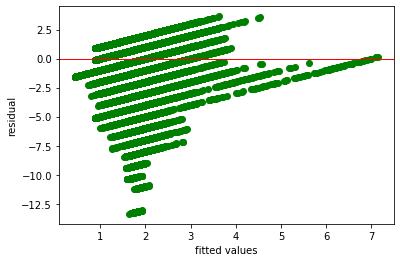

In [0]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,residuals, color = 'green' )
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.ylabel('residual')
plt.xlabel('fitted values')

# Approach 2: Logistic approach



In [0]:
# Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

def assign_status():
    both_ranking['diff']= both_ranking["home_score"] - both_ranking["away_score"]
    status = []
    for agg_score in both_ranking['diff']:
            if agg_score>0:
                status.append('win')

            elif agg_score<0:
                status.append('loss')
            else:
                status.append('draw')
    both_ranking['status']= status
            


In [0]:
assign_status()   

In [0]:
both_ranking.sample(8)

,home_team,away_team,home_score,away_score,tournament,home_team raking,away_team raking,diff,status
189738,Guatemala,Mexico,1,4,18,58.0,15.0,-3,loss
204369,Finland,Poland,5,3,18,43.0,26.0,2,win
717466,Republic of Ireland,Portugal,0,2,18,14.0,61.0,-2,loss
60867,Austria,Germany,3,2,18,46.0,2.0,1,win
1025094,Germany,Norway,2,0,18,14.0,198.0,2,win
209523,Brazil,Paraguay,2,0,18,1.0,26.0,2,win
510965,Norway,Finland,0,2,21,47.0,50.0,-2,loss
904858,Denmark,Norway,1,3,21,28.0,178.0,-2,loss


In [0]:
#understanding the datatypes of our dataset
both_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048115 entries, 0 to 1048574
Data columns (total 9 columns):
home_team           1048115 non-null object
away_team           1048115 non-null object
home_score          1048115 non-null int64
away_score          1048115 non-null int64
tournament          1048115 non-null int32
home_team raking    1048115 non-null float64
away_team raking    1048115 non-null float64
diff                1048115 non-null int64
status              1048115 non-null object
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 76.0+ MB


In [0]:
#label encoding"status"

both_ranking['status'] = le.fit_transform(both_ranking['status'])

In [0]:
both_ranking.sample(8)

,home_team,away_team,home_score,away_score,tournament,home_team raking,away_team raking,diff,status
991508,Egypt,Bulgaria,1,0,18,44.0,176.0,1,2
625072,Chile,Peru,1,0,5,47.0,6.0,1,2
836693,Chile,United States,5,2,16,21.0,154.0,3,2
5252,Wales,Scotland,1,5,18,52.0,64.0,-4,1
289712,Uruguay,Argentina,0,1,9,18.0,116.0,-1,1
899228,Fiji,New Zealand,0,9,18,140.0,172.0,-9,1
774806,Trinidad and Tobago,Haiti,0,0,18,69.0,19.0,0,0
735310,Romania,Poland,0,0,18,3.0,38.0,0,0


In [0]:
#diving our dataset into dependent and inpendent variables
x = both_ranking[['home_team raking','away_team raking', 'tournament']]
y = both_ranking['status']

In [0]:
# Splitting our dataset
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)


In [0]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [0]:
#fiting regression model to our dataset
from sklearn.linear_model import LogisticRegression
LogRes = LogisticRegression()
LogRes.fit(x_train, y_train)

C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#using our model to make prediction
y_pred = LogRes.predict(x_test)

In [0]:
#Testing the accuracy of our model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix 


array([[    0,  2897, 33190],
       [    0,  7822, 61154],
       [    0,  7181, 97379]], dtype=int64)

In [0]:
LogRes.score(x_test, y_test)

0.5018580976324163